In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import*
import wanrnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sample = pd.read_csv("Downloads\SampleSuperstore.csv")
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
sample.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
sample.shape

(9994, 13)

In [8]:
#Checking the type of data

In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
#we can see that there is no such value that is empty
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
#Checking if there is duplicate data

In [13]:
sample.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [14]:
sample.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [15]:
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [35]:
#correalation between variables. Checking if change in one variable affects the other
sample.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [18]:
#Covariance

In [19]:
sample.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [37]:
#Data visualisation
sample.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

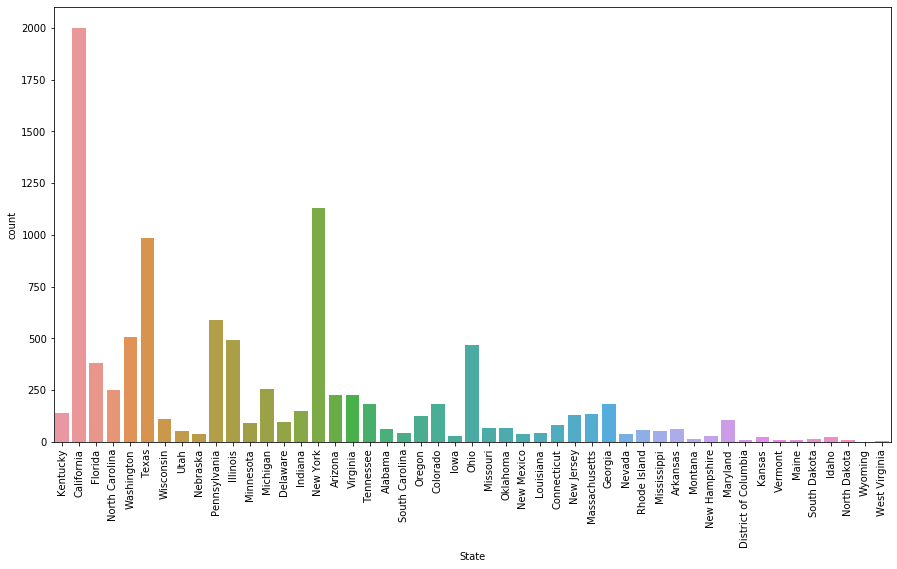

In [44]:
print(sample['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=sample['State'])
plt.xticks(rotation=90)
plt.show()

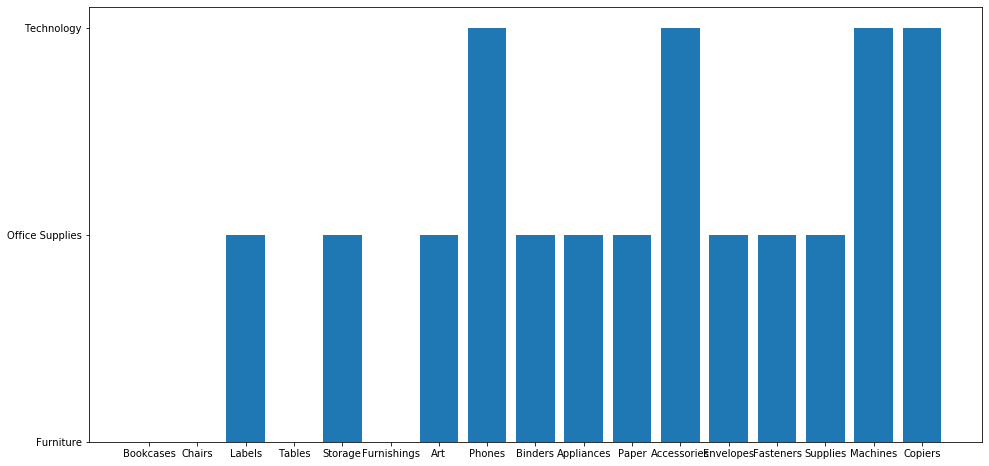

In [51]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=sample)
plt.xticks(rotation=90)
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

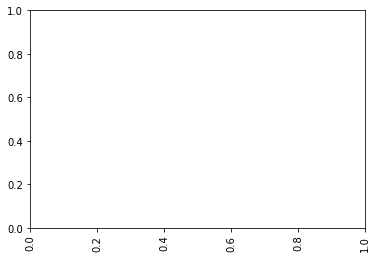

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


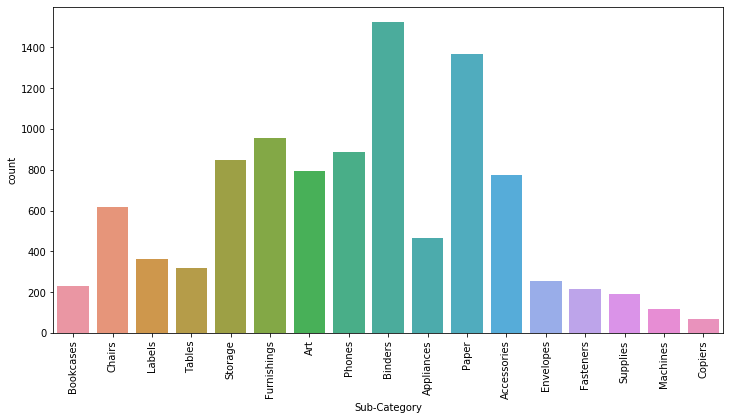

In [54]:
print(sample['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=sample['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

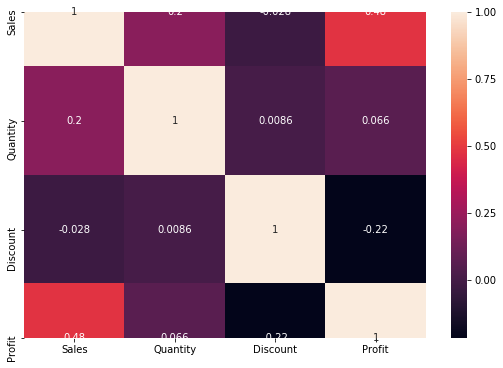

In [55]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(sample.corr(), annot= True)
plt.show()

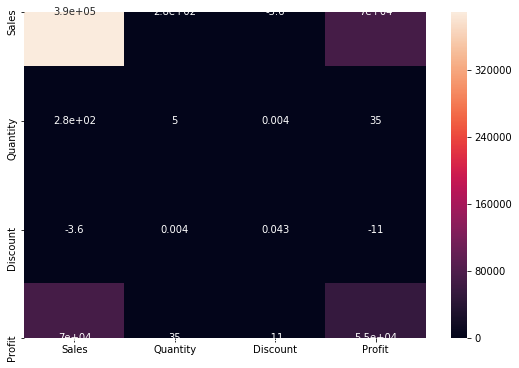

In [56]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(sample.cov(), annot= True)
plt.show()

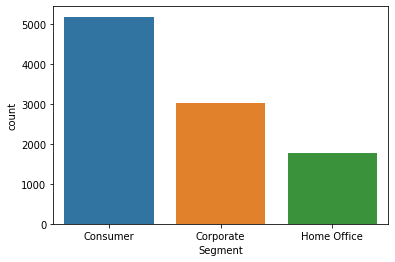

In [57]:
sns.countplot(x=sample['Segment'])

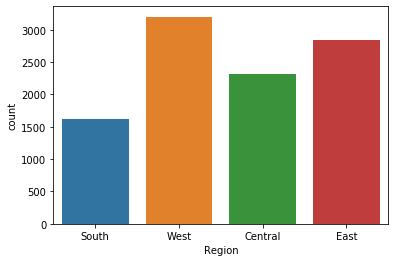

In [58]:
sns.countplot(x=sample['Region'])

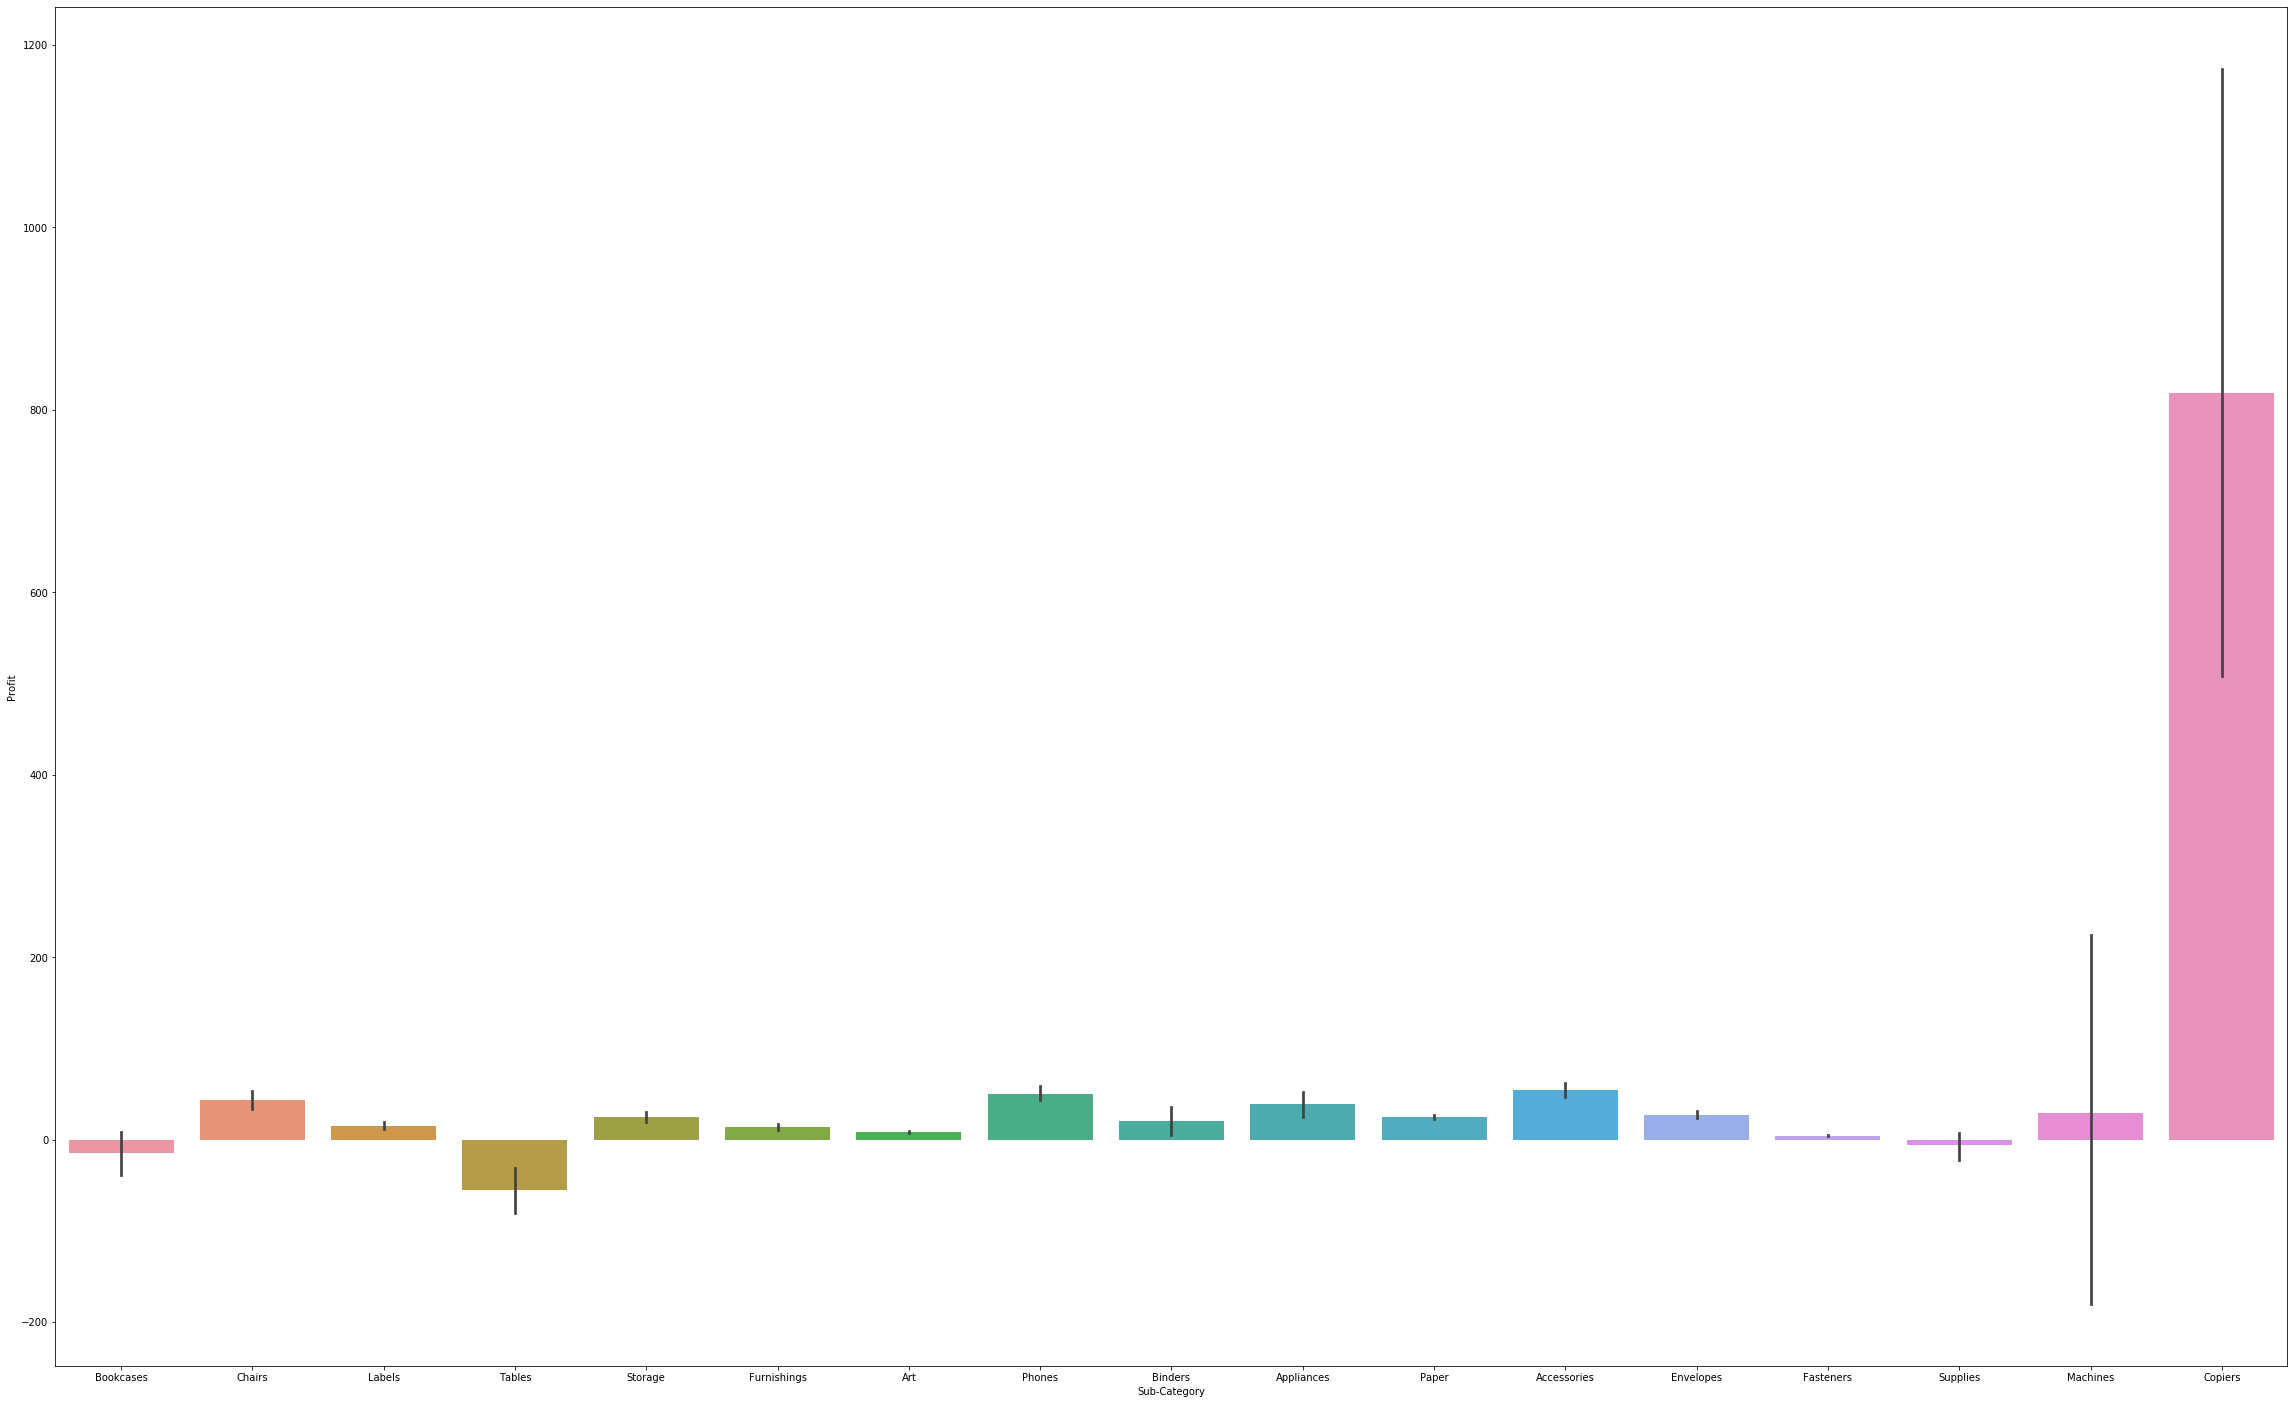

In [61]:
plt.figure(figsize=(40,25))
sns.barplot(x=sample['Sub-Category'], y=sample['Profit'])

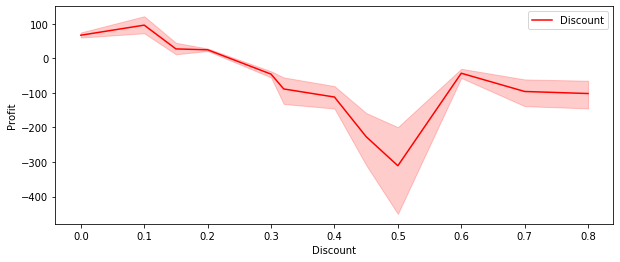

In [62]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = sample, color = 'r', label= 'Discount')
plt.legend()

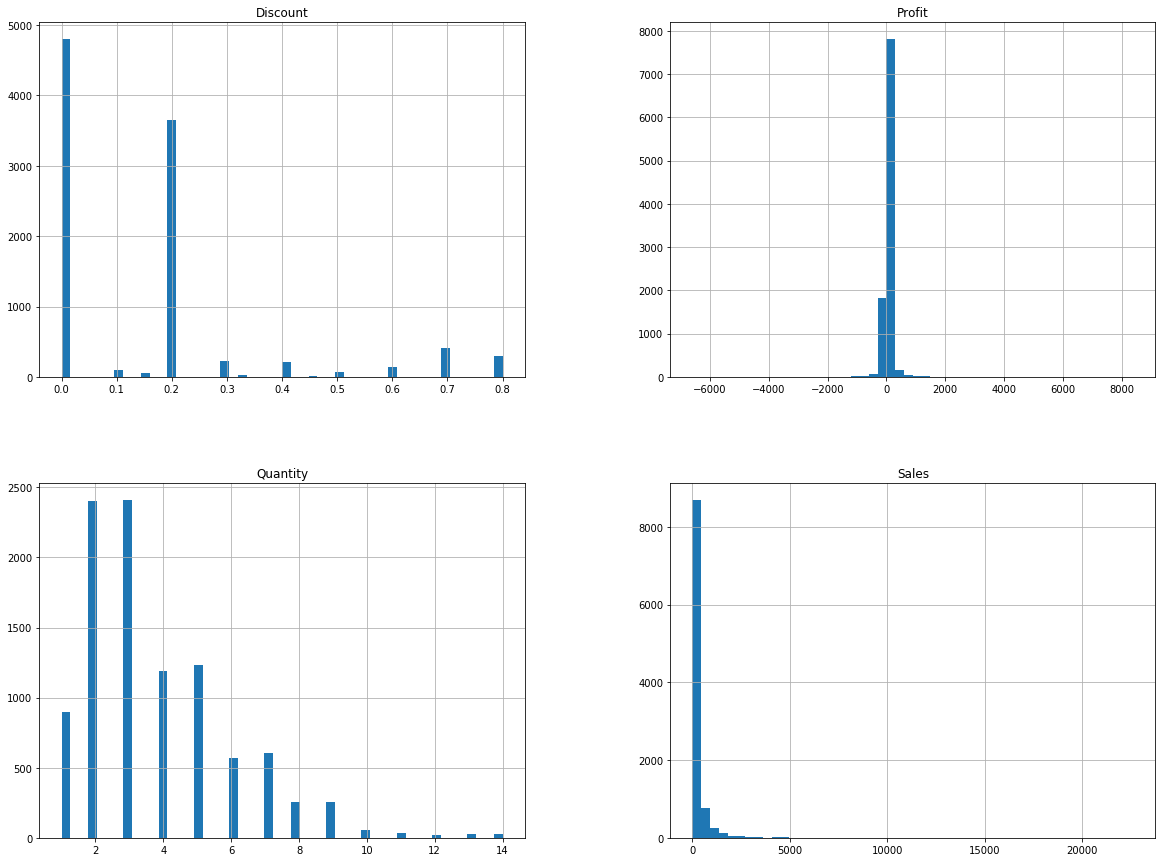

In [63]:
sample.hist(bins=50 ,figsize=(20,15))
plt.show()

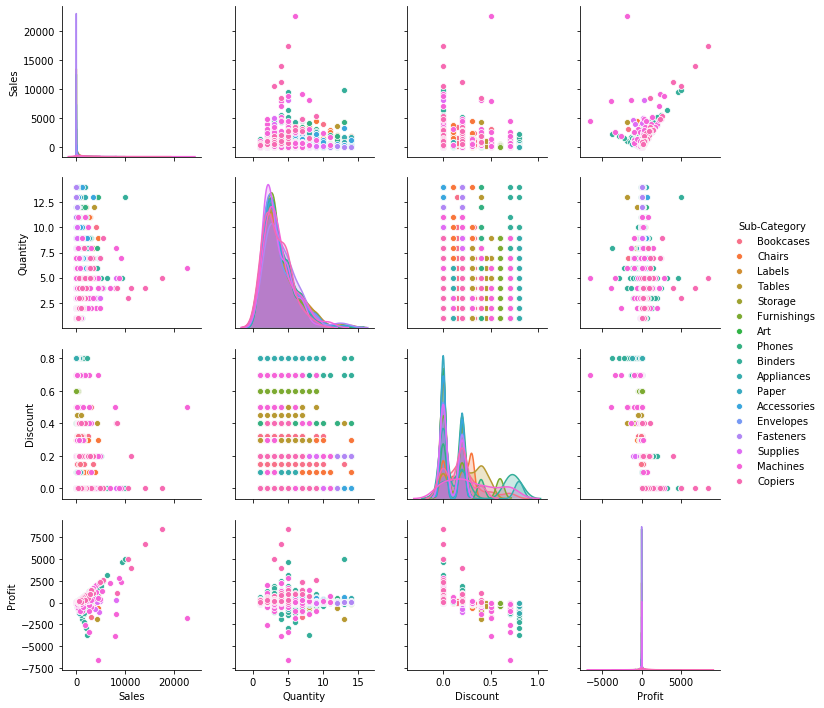

In [64]:
figsize=(15,10)
sns.pairplot(sample,hue='Sub-Category')

In [65]:
grouped=pd.DataFrame(sample.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [66]:
sample.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


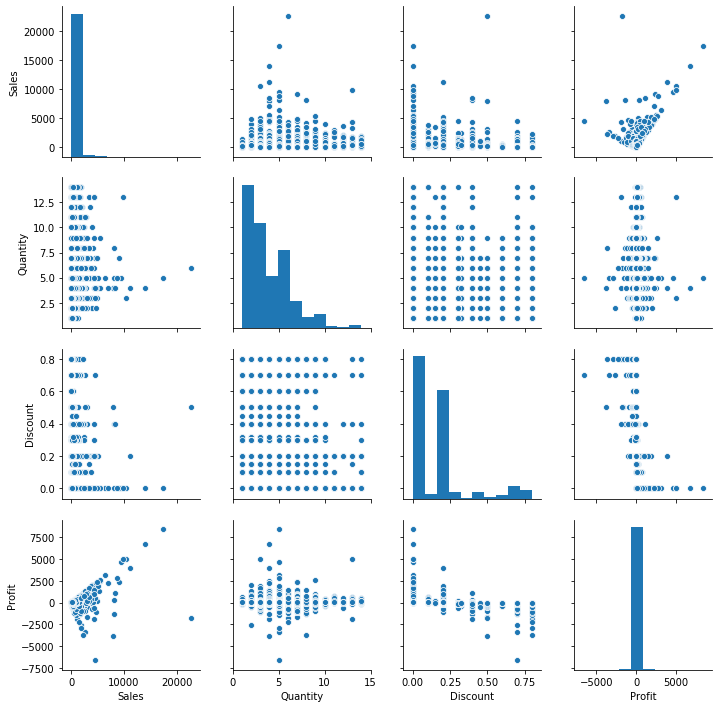

In [67]:
sns.pairplot(sample)

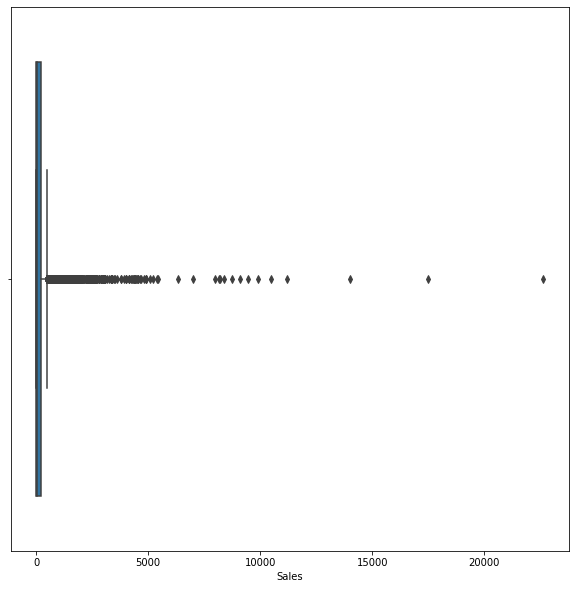

In [68]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(sample['Sales'])

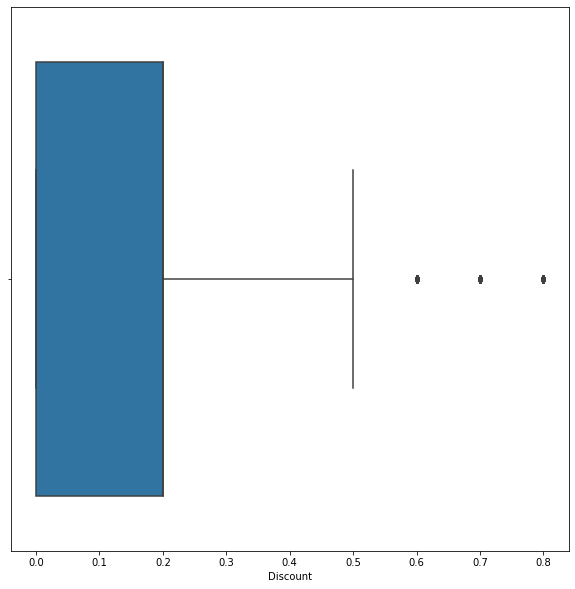

In [69]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(sample['Discount'])

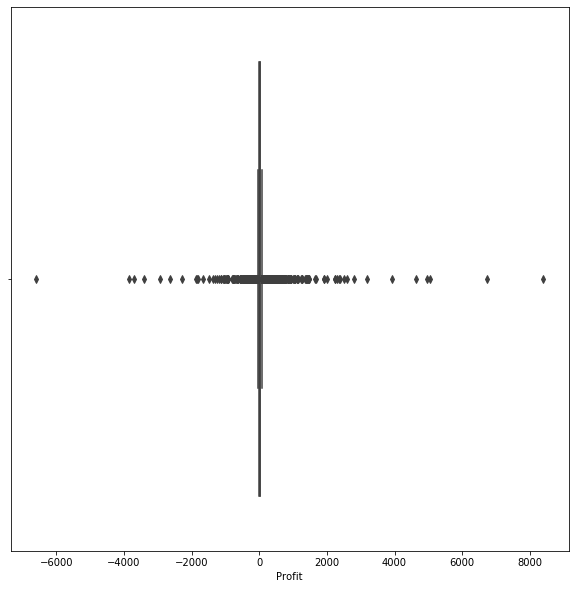

In [70]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(sample['Profit'])

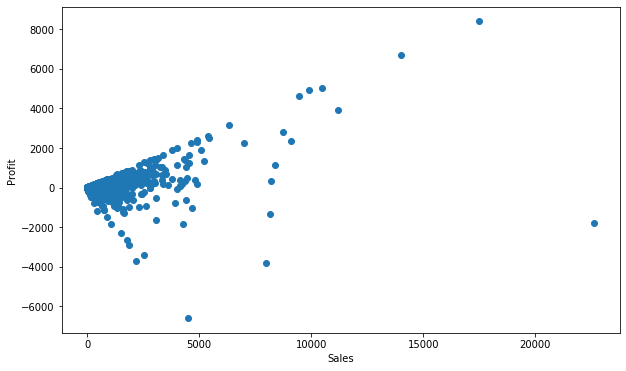

In [71]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(sample["Sales"] , sample["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()